# HR analytics case study

# Problem statement

HR has given the dataset the peoples are leaving the company or not

HR need to figure out why they are leaving the company and need to give suggestions for not to leave

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("people.csv")

In [7]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [10]:
df.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dept                      object
salary                    object
dtype: object

In [11]:
df.corr(numeric_only=True)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
lastEvaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numberOfProjects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
avgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
timeSpent.company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotionInLast5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [12]:
df.duplicated().sum()

3008

In [13]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [14]:
df['promotionInLast5years'].value_counts()

promotionInLast5years
0    14680
1      319
Name: count, dtype: int64

In [15]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [16]:
#checking the outliers

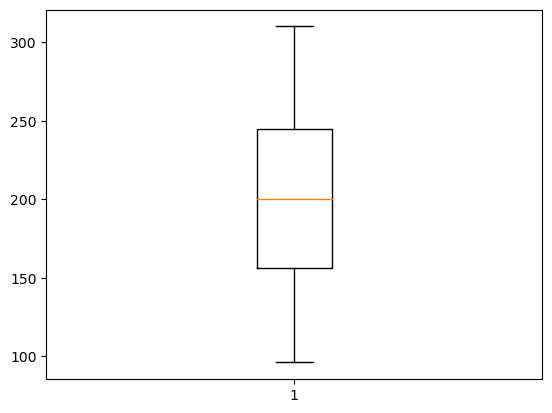

In [17]:
plt.boxplot(df['avgMonthlyHours'])
plt.show()

In [18]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

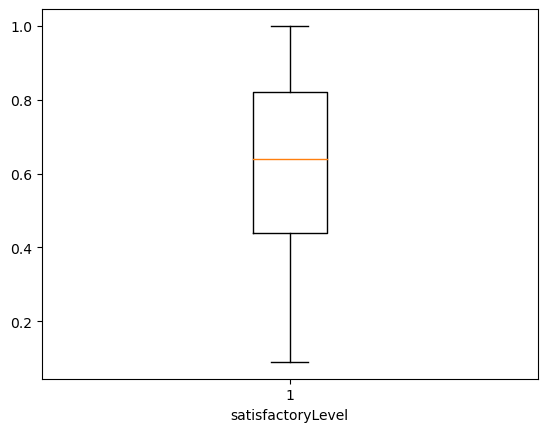

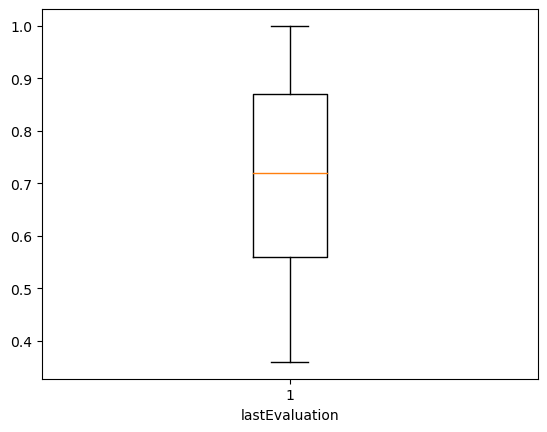

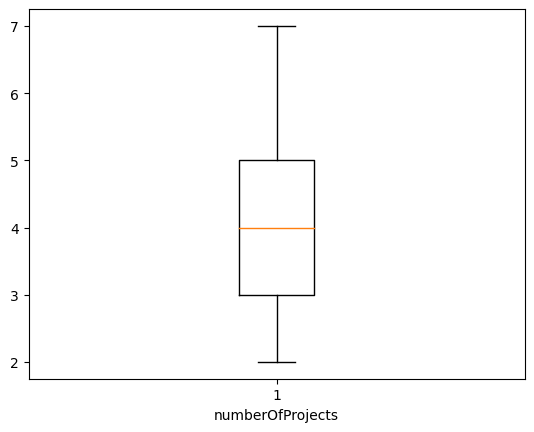

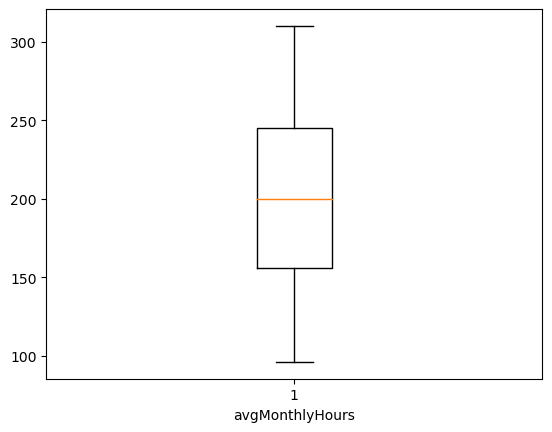

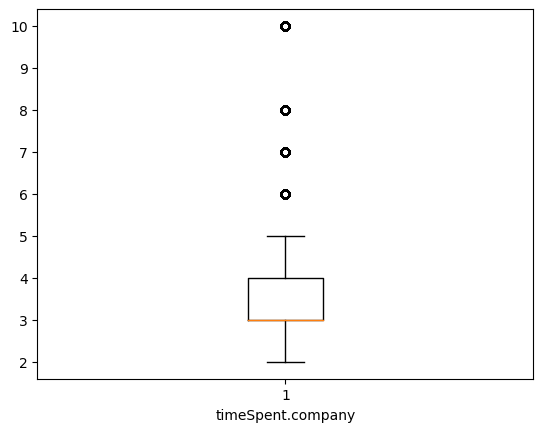

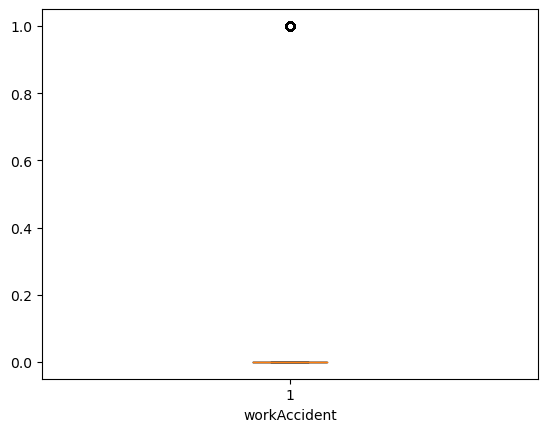

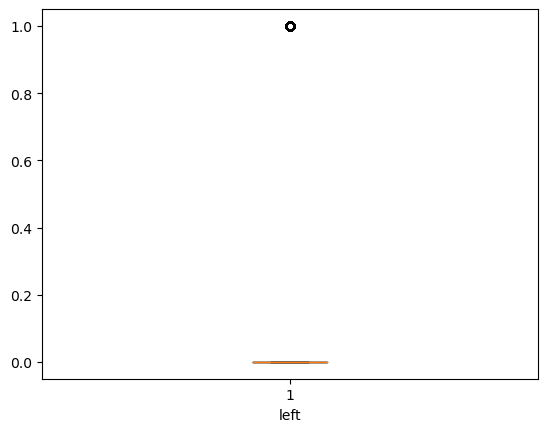

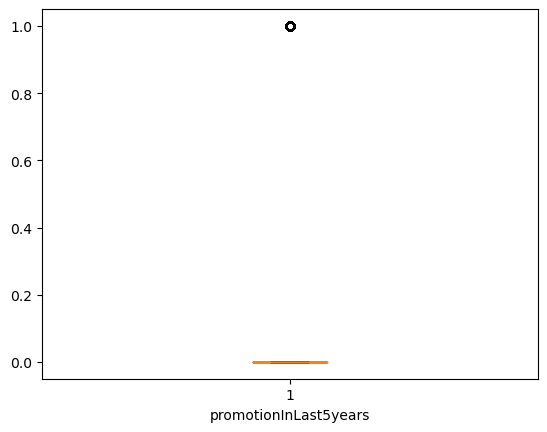

In [19]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

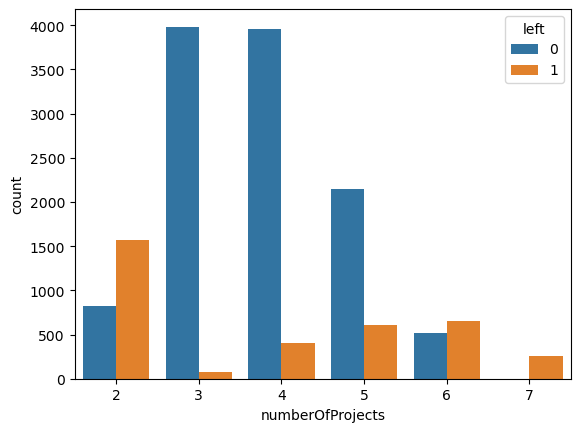

In [20]:
sns.countplot(data=df,x="numberOfProjects",hue="left")
plt.show()

In [21]:
df['avgMonthlyHours'].mean()

201.0503366891126

C:\Users\Dell\AppData\Local\Temp\ipykernel_12880\3575966049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avgMonthlyHours'])


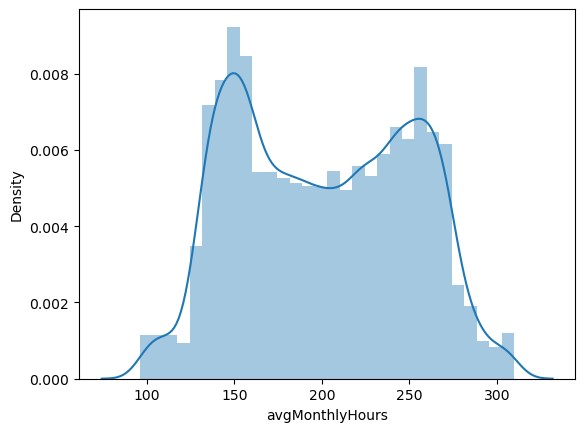

In [24]:
sns.distplot(df['avgMonthlyHours'])
plt.show()

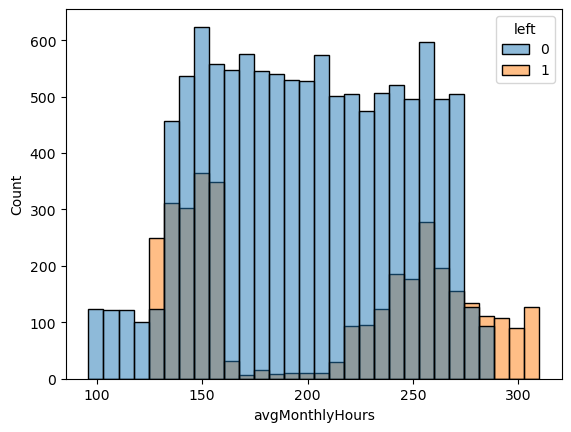

In [26]:
sns.histplot(x='avgMonthlyHours',hue='left',data=df)
plt.show()

In [ ]:
#suggestions
->200 hr should be sufficient in a month.. to retain employees
->we can distribute the working hours of 300 plus to those who are just working 100


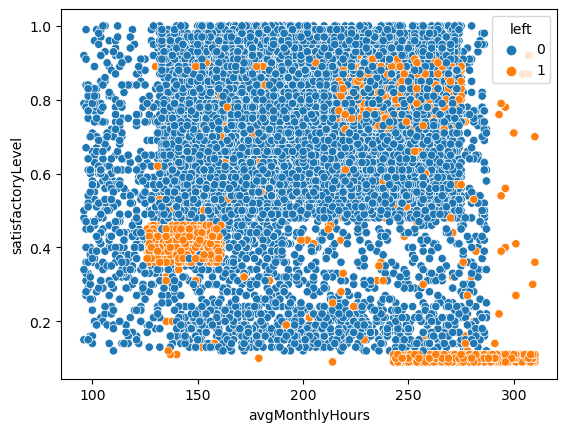

In [27]:
sns.scatterplot(data=df,x='avgMonthlyHours',y='satisfactoryLevel',hue='left')
plt.show()

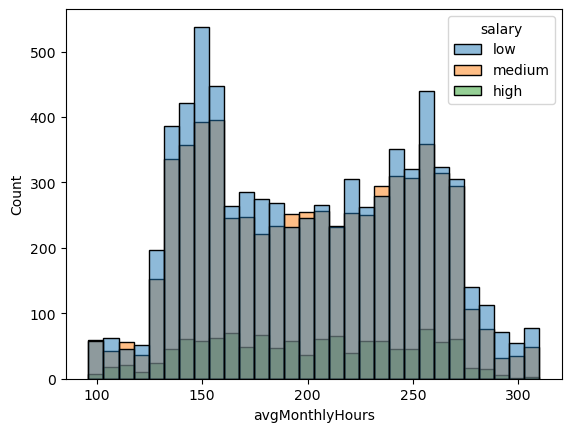

In [28]:
sns.histplot(x='avgMonthlyHours',hue='salary',data=df)
plt.show()

C:\Users\Dell\anaconda3\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


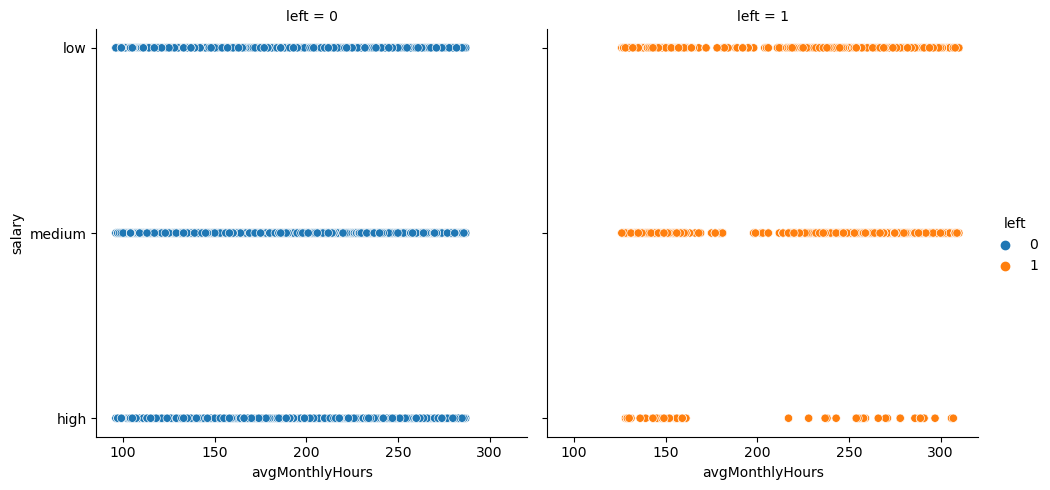

In [29]:
sns.relplot(data = df, x = 'avgMonthlyHours', y = 'salary', kind = 'scatter', hue = 'left', col = 'left')
plt.show()


In [31]:
df[df['avgMonthlyHours']>200].groupby("left").count()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary
left,,,,,,,,,
0,5560,5560,5560,5560,5560,5560,5560,5560,5560
1,1915,1915,1915,1915,1915,1915,1915,1915,1915


In [32]:
df[df['avgMonthlyHours']<200].groupby("left").count()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary
left,,,,,,,,,
0,5810,5810,5810,5810,5810,5810,5810,5810,5810
1,1656,1656,1656,1656,1656,1656,1656,1656,1656


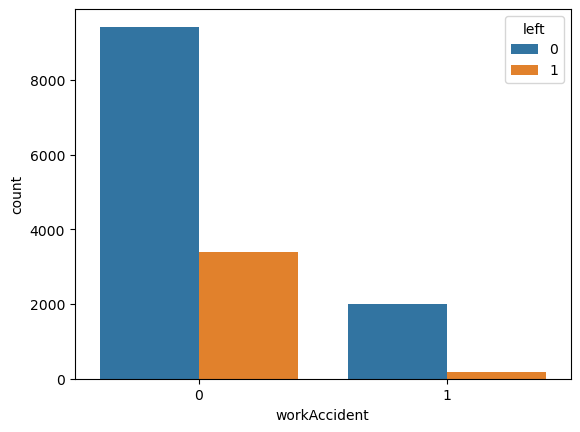

In [33]:
sns.countplot(data=df,x='workAccident',hue='left')
plt.show()

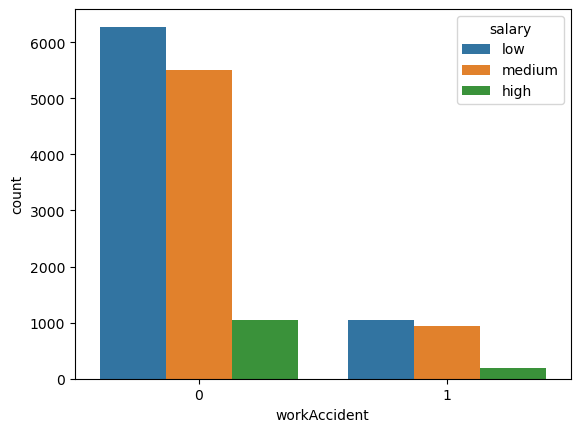

In [35]:
sns.countplot(data=df,x='workAccident',hue='salary')
plt.show()

In [34]:
#inference-->work accidents are not relevent reasons for leaving the company
#suggestions-nill

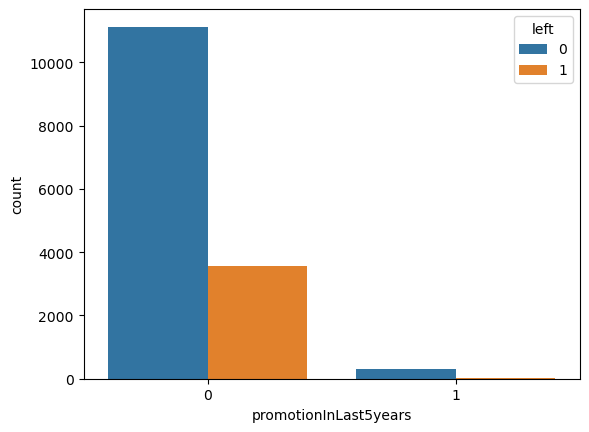

In [36]:
sns.countplot(data=df,x="promotionInLast5years",hue="left")
plt.show()

In [37]:
df[df['promotionInLast5years']==1].groupby("left").count()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary
left,,,,,,,,,
0,300,300,300,300,300,300,300,300,300
1,19,19,19,19,19,19,19,19,19


In [38]:
df[df['promotionInLast5years']==0].groupby("left").count()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary
left,,,,,,,,,
0,11128,11128,11128,11128,11128,11128,11128,11128,11128
1,3552,3552,3552,3552,3552,3552,3552,3552,3552


In [39]:
df['dept'].value_counts()

dept
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [40]:
df['dept'].nunique()

10

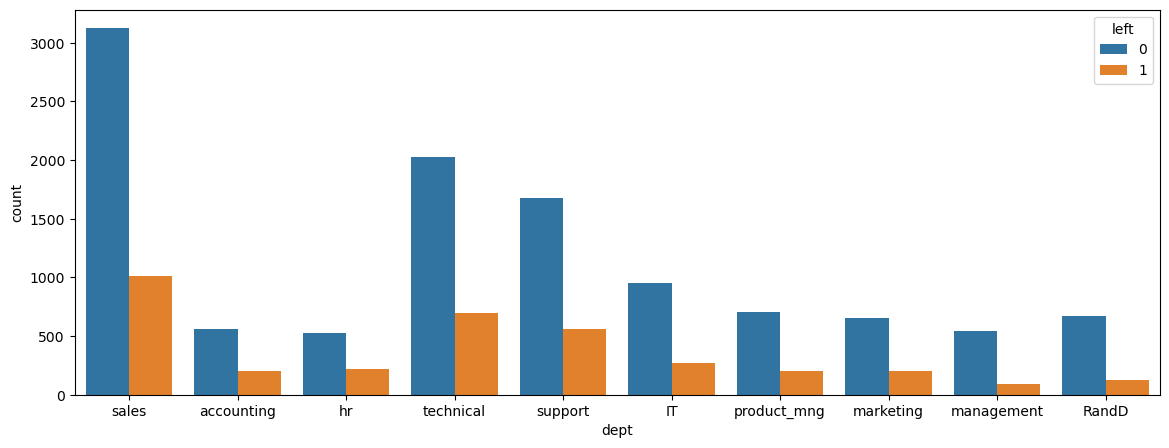

In [43]:
plt.figure(figsize=(14,5))
sns.countplot(data=df,x='dept',hue="left")
plt.show()

In [ ]:
#inference

#people from sales,technical,support are leaving most

#suggestions:
#give option to move other dept
#incentives
#bonus
#Allocating resources to other teams allows them to gain a comprehensive understanding of the entire end-to-end flow
#timely promotion,appropriate workloadcontinuous valuation,emotional connection  with the company vision


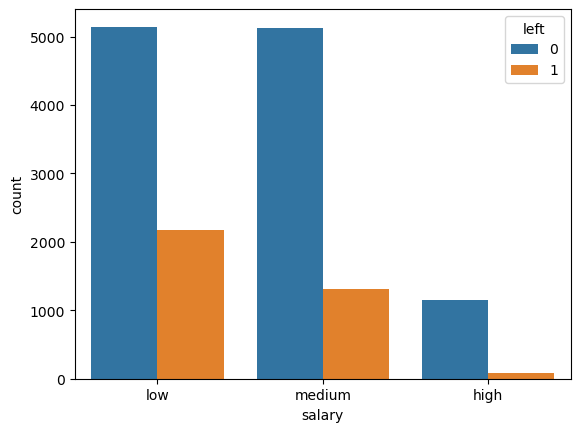

In [44]:
sns.countplot(data=df,x="salary",hue="left")
plt.show()

In [45]:
df.head(2)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [47]:
df[df['salary']=="low"].shape

(7316, 10)

In [48]:
df[df['salary']=="medium"].shape

(6446, 10)

In [49]:
df[df['salary']=="high"].shape

(1237, 10)

In [50]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

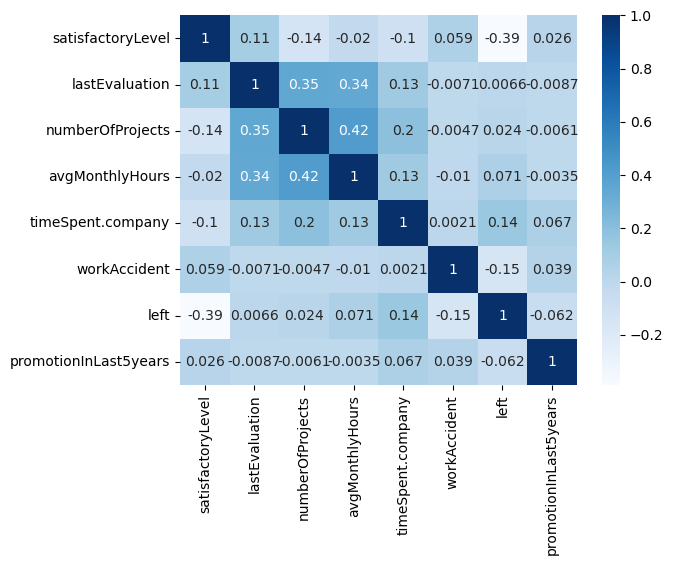

In [52]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Blues")
plt.show()